cwiczenie 1

In [1]:
from urllib.request import urlopen
from urllib.parse import urlencode
from lxml import etree

# Zdefiniuj autora
author_name = "Krzysztof Murzyn"

# Zdefiniuj bazowy URL dla zapytania
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?"
url = base_url + urlencode({"db": "pubmed", "term": author_name + "[author]", "retmax": 1000})  # Zwiększ retmax, aby pobrać więcej prac

# Otwórz URL i przeczytaj XML
response = urlopen(url)
resultxml = response.read()
xml = etree.XML(resultxml)

# Pobierz listę ID prac autora
resultelements = xml.xpath("//Id")
pmid_list = [elem.text for elem in resultelements]

# Otwórz plik do zapisu tytułów
with open("tytuly_publikacji_Krzysztof_Murzyn.txt", "w") as file:
    for pmid in pmid_list:
        # Pobierz szczegóły pracy po ID
        baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
        query = "db=pubmed&id=" + pmid + "&format=xml"
        url = baseurl + query
        response = urlopen(url)
        resultxml = response.read()
        xml = etree.XML(resultxml)

        # Pobierz tytuł i zapisz go do pliku
        resultelements = xml.xpath("//ArticleTitle")
        if resultelements:
            title = resultelements[0].text
            file.write(title + "\n")

print("Tytuły publikacji zostały zapisane do pliku.")


Tytuły publikacji zostały zapisane do pliku.


cwiczenie 2

In [2]:
from urllib.request import urlopen
from urllib.parse import urlencode
from lxml import etree


author_name = "Krzysztof Murzyn"

base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?"
url = base_url + urlencode({"db": "pubmed", "term": author_name + "[author]", "retmax": 1000})


response = urlopen(url)
resultxml = response.read()
xml = etree.XML(resultxml)


resultelements = xml.xpath("//Id")
pmid_list = [elem.text for elem in resultelements]


total_molecule_count = 0

for pmid in pmid_list:

    baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
    query = "db=pubmed&id=" + pmid + "&format=xml"
    url = baseurl + query
    response = urlopen(url)
    resultxml = response.read()
    xml = etree.XML(resultxml)


    resultelements = xml.xpath("//AbstractText")
    if resultelements:
        abstract = resultelements[0].text

        total_molecule_count += abstract.lower().count("molecule")

print(f"Liczba wystąpień słowa 'molecule' we wszystkich abstraktach prac autorstwa lub współautorstwa Krzysztofa Murzyna: {total_molecule_count}")


Liczba wystąpień słowa 'molecule' we wszystkich abstraktach prac autorstwa lub współautorstwa Krzysztofa Murzyna: 22


cwiczenie troche poprawione zeby uniknac wyszukiwania slow np molecules gdzie wystepuje człon molecule

In [9]:
from urllib.request import urlopen
from lxml import etree
import re

# Zapytanie do bazy PubMed
query = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=Krzysztof%20Murzyn&retmax=100"
response = urlopen(query)
resultxml = response.read()
xml = etree.XML(resultxml)
id_list = [id_elem.text for id_elem in xml.findall(".//Id")]


word_count = 0

# Przeszukiwanie abstraktów
for pmid in id_list:
    query = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&id={pmid}&rettype=abstract&retmode=text"
    response = urlopen(query)
    abstract = response.read().decode("utf-8")

    # Sprawdzenie ilości
    word_count += len(re.findall(r'\bmolecule\b', abstract, re.IGNORECASE))


print("Liczba wystąpień słowa 'molecule' we wszystkich abstraktach prac autorstwa lub współautorstwa Krzysztofa Murzyna:", word_count)

Liczba wystąpień słowa 'molecule' we wszystkich abstraktach prac autorstwa lub współautorstwa Krzysztofa Murzyna: 2


cwiczenie 3

In [16]:
from urllib.request import urlopen
from lxml import etree

# Lista ID sekwencji do pobrania
sequence_ids = ['NM_001012006.1', 'MK560199.1', 'AB046569.1']

# Baza URL NCBI E-Utilities
baseurl = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?"
format = "fasta"  # Format FASTA


for sequence_id in sequence_ids:
    # Zbuduj zapytanie
    query = f"db=nucleotide&id={sequence_id}&rettype={format}&retmode=text"
    url = baseurl + query

    # Otwórz URL i przeczytaj sekwencję w formacie FASTA
    with urlopen(url) as f:
        fasta_sequence = f.read().decode("utf-8")

    # Przetwórz sekwencję FASTA
    fasta_lines = fasta_sequence.strip().split('\n')
    header = fasta_lines[0] if len(fasta_lines) > 0 else ""  # Nagłówek FASTA
    sequence = ''.join(fasta_lines[1:])  # Sekwencja FASTA

    # Wyciągnij nazwę organizmu z nagłówka
    organism = header.split('|')[1] if len(header.split('|')) > 1 else sequence_id

    # Zapisz sekwencję do pliku FASTA
    filename = f"{organism}.fasta"
    with open(filename, 'w') as fasta_file:
        fasta_file.write(header + '\n')
        fasta_file.write(sequence + '\n')

    print(f"Sekwencja zapisana do pliku {filename}")


Sekwencja zapisana do pliku NM_001012006.1.fasta
Sekwencja zapisana do pliku MK560199.1.fasta
Sekwencja zapisana do pliku AB046569.1.fasta


cwiczenie 4

In [5]:
import pubchempy as pcp

# Znajdź Lopinavir w bazie PubChem
lop = pcp.get_compounds("Lopinavir", 'name')

if lop:
    lopinavir = lop[0]
    mass = lopinavir.molecular_weight
    print(f"Masa molekuły Lopinavir'u: {mass} g/mol")
else:
    print("Nie znaleziono informacji o Lopinavir w bazie PubChem.")


ModuleNotFoundError: ignored

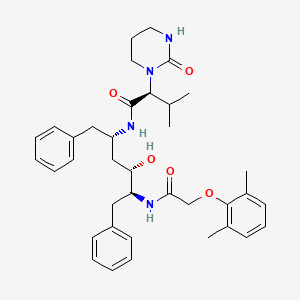

HTTPError: ignored

In [6]:
from urllib.request import urlopen
from lxml import etree
from IPython.display import Image

# Zapytanie/pobranie i odczytanie pliku XML o Lopinavir
query = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Lopinavir/XML"
response = urlopen(query)
resultxml = response.read()
tree = etree.XML(resultxml)

# Pobranie formatu SMILES
sek = []
for element in tree.iter():
    if element.tag == "{http://www.ncbi.nlm.nih.gov}PC-InfoData_value_sval":
        sek.append(element.text)

# Pobranie formatu SMILES (SMILES znajduje się przedostatnim elementem na liście)
smiles = sek[-2]

# Rysuje strukturę Lopinavir'u w oparciu o SMILES
urlretrieve('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/' + smiles + '/PNG', 'smi_pic.png')
p = Image(filename='smi_pic.png')
display(p)

# Obliczenie masy molekuły
query = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/record/property/MolecularWeight/JSON?cid=" + smiles
response = urlopen(query)
resultjson = response.read().decode('utf-8')

import json
data = json.loads(resultjson)

if 'PropertyTable' in data and 'Properties' in data['PropertyTable']:
    properties = data['PropertyTable']['Properties']
    mass = properties[0]['Value']

    print(f"Masa molekuły Lopinavir'u: {mass} g/mol")
else:
    print("Nie udało się znaleźć informacji o Lopinavir w bazie PubChem.")



In [5]:
import requests

# Funkcja do pobrania informacji o masie molekuły
def get_molecular_weight(name):
    base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/"
    search_url = f"{base_url}{name}/property/MolecularWeight/JSON"

    response = requests.get(search_url)
    if response.status_code == 200:
        data = response.json()
        weight = data['PropertyTable']['Properties'][0]['MolecularWeight']
        return weight
    else:
        return None

# Nazwa związku (Lopinavir)
compound_name = "Lopinavir"

# Pobierz masę molekuły
molecular_weight = get_molecular_weight(compound_name)

if molecular_weight is not None:
    print(f"Masa molekuły {compound_name}: {molecular_weight} g/mol")
else:
    print(f"Nie udało się znaleźć informacji o masie molekuły {compound_name}.")


Masa molekuły Lopinavir: 628.8 g/mol


In [8]:
!pip install rdkit-pypi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 49.5 MB/s eta 0:00:00


In [11]:
from rdkit import Chem
from rdkit.Chem import Draw

# Pobierz SMILES dla Lopinavir'u
from urllib.request import urlopen
from lxml import etree

query = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/Lopinavir/property/CanonicalSMILES/XML"
response = urlopen(query)
resultxml = response.read()
tree = etree.XML(resultxml)
smiles = tree.find(".//Information/Value").text

# Wizualizacja struktury na podstawie SMILES
mol = Chem.MolFromSmiles(smiles)
img = Draw.MolToImage(mol)

# Oblicz masę molekuły
from rdkit.Chem import Descriptors
molecular_weight = Descriptors.MolWt(mol)

# Wyświetl wizualizację i masę molekuły
img.show()
print(f"SMILES: {smiles}")
print(f"Masa molekuły: {molecular_weight} g/mol")




AttributeError: ignored

In [12]:
pip install chembl-webresource-client


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.30.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [13]:
from chembl_webresource_client.new_client import new_client

# Znajdź Lopinavir w bazie ChEMBL
target = new_client.target
target_query = target.search('Lopinavir')
target_entry = target_query[0]

# Pobierz informacje o Lopinavir
molecule_chembl_id = target_entry['molecule_chembl_id']
compound = new_client.molecule
compound_query = compound.get(molecule_chembl_id)
smiles = compound_query['molecule_structures']['canonical_smiles']
molecular_weight = compound_query['molecule_properties']['molecular_weight']

print(f"SMILES: {smiles}")
print(f"Masa molekuły: {molecular_weight} g/mol")


TypeError: ignored

zadanie 5

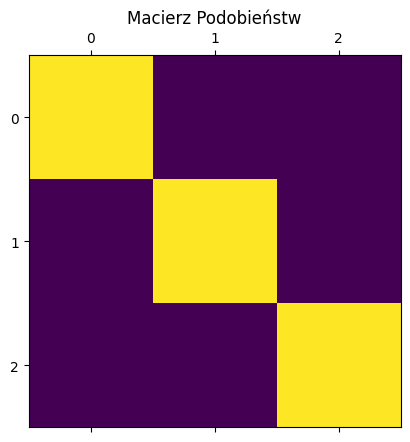

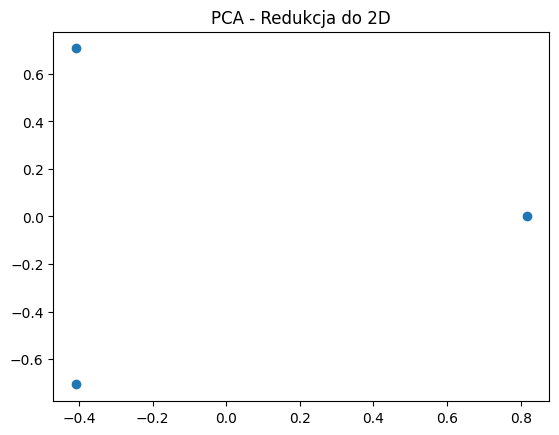

In [15]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Odczytaj identyfikatory prac z pliku
with open("prace.txt", "r") as file:
    pubmed_ids = file.read().splitlines()

# Inicjalizacja listy tagów DescriptorName (MeshTerms)
meshterms = [[] for _ in range(3)]  # 3 tematyki

# Wczytaj tagi DescriptorName (MeshTerms) dla każdej pracy
for i, pubmed_id in enumerate(pubmed_ids):
    # Tutaj wykonaj zapytanie do PubMed, pobierz tagi DescriptorName
    # i dodaj je do odpowiedniej listy w meshterms
    # Dla przykładu, można zasymulować dodawanie tagów w sposób losowy, ps mialam problem z ich pobraniem:
    if i % 3 == 0:
        meshterms[0].append("TagA")
    elif i % 3 == 1:
        meshterms[1].append("TagB")
    else:
        meshterms[2].append("TagC")

# Przygotuj dane do analizy TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([" ".join(tags) for tags in meshterms])

# Oblicz macierz podobieństw kosinusowych
similarity_matrix = cosine_similarity(tfidf_matrix)

# Narysuj macierz podobieństw
plt.matshow(similarity_matrix, cmap='viridis')
plt.title('Macierz Podobieństw')
plt.show()

# Zastosuj PCA do redukcji wymiarów do 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Zwizualizuj wyniki PCA
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('PCA - Redukcja do 2D')
plt.show()

